In [39]:
import numpy as np
import math as mp
import pandas as pd

In [40]:
# Some parameter initialization. 
sigma = 5
beta = 1/(1.05)
W = 1
N = np.linspace(15,23,1000)
N1 =  N*0.99

In [41]:

tau1= -1/np.log(beta) - N
tau1[tau1<0] = 0  
tau1_ceil = np.ceil(tau1)
tau1_floor = np.floor(tau1)
tprod1_ceil=  beta**tau1_ceil * (tau1_ceil + N)
tprod1_floor=  beta**tau1_floor * (tau1_floor + N)


In [42]:
tau1[(tprod1_ceil-tprod1_floor)>0] = tau1_ceil[(tprod1_ceil-tprod1_floor)>0]
tau1[(tprod1_ceil-tprod1_floor)<0] = tau1_floor[(tprod1_ceil-tprod1_floor)<0]
tau1[tau1<0] = 0  
tprod1 = beta**tau1 * (tau1 + N)

In [43]:
tau1

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [44]:
tau2= -1/np.log(beta) - N1
tau2[tau2<0] = 0  
tau2_ceil = np.ceil(tau2)
tau2_floor = np.floor(tau2)
tprod2_ceil=  beta**tau2_ceil * (tau2_ceil + N1)
tprod2_floor=  beta**tau2_floor * (tau2_floor + N1)


In [45]:
tau2[(tprod2_ceil-tprod2_floor)>0] = tau2_ceil[(tprod2_ceil-tprod2_floor)>0]
tau2[(tprod2_ceil-tprod2_floor)<0] = tau2_floor[(tprod2_ceil-tprod2_floor)<0]
tau2[tau2<0] = 0
t_prod2 = beta**tau2 * (tau2 + N1)


In [46]:
tau2

array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [30]:
P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma))
P = np.zeros((int(np.max(tau2))+2, 1))
P[0,0] = P0 
P[-1,0] = P0
for j in range(0, int(np.max(tau2))): 
    tau1_temp = tau1[tau1 != j]
    tau2_temp = tau2[tau2 == j]
    N_temp1 = N[tau1 != j]
    N_temp2 = N1[tau2 == j]
    N_temp = np.concatenate([N_temp1, N_temp2])
    tau_temp = np.concatenate([tau1_temp, tau2_temp])
    tprod_temp = beta**tau_temp * (tau_temp + N_temp)
    P[j+1,0] = (np.sum(1/(tprod_temp)**(1-sigma)))**(1/(1-sigma))


In [31]:
P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma))
P1 = np.zeros((int(np.max(tau2))+2, 1))
P1[0,0] = P0 
P1[-1,0] = P0
for j in range(0, int(np.max(tau2))): 
    tau1_temp = tau1[tau1 != j]
    tau2_temp = tau2[tau2 == j]
    N_temp1 = N[tau1 != j]
    N_temp2 = N[tau2 == j]
    N_temp = np.concatenate([N_temp1, N_temp2])
    tau_temp = np.concatenate([tau1_temp, tau2_temp])
    tprod_temp = beta**tau_temp * (tau_temp + N_temp)
    P1[j+1,0] = (np.sum(1/(tprod_temp)**(1-sigma)))**(1/(1-sigma))

In [32]:
P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma))
P1 = np.zeros((int(np.max(tau2))+2, 1))
P1[0,0] = P0 
P1[-1,0] = P0
for j in range(0, int(np.max(tau2))): 
    tau1_temp = tau1[tau1 != j]
    tau2_temp = tau2[tau2 == j]
    N_temp1 = N[tau1 != j]
    N_temp2 = N[tau2 == j]
    N_temp = np.concatenate([N_temp1, N_temp2])
    tau_temp = np.concatenate([tau1_temp, tau2_temp])
    tprod_temp = beta**tau_temp * (tau_temp + N_temp)
    P1[j+1,0] = (np.sum(1/(tprod_temp)**(1-sigma)))**(1/(1-sigma))

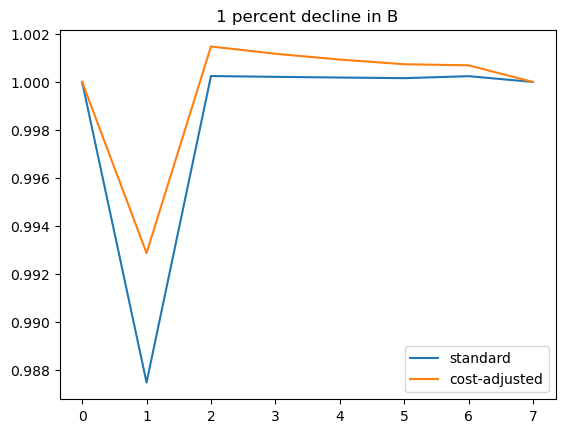

In [33]:
import matplotlib.pyplot as plt

plt.plot( (1/ P)* P[0])
plt.plot( (1/ P1)* P1[0])
plt.title('1 percent decline in B')
plt.legend(['standard', 'cost-adjusted'])
plt.show()


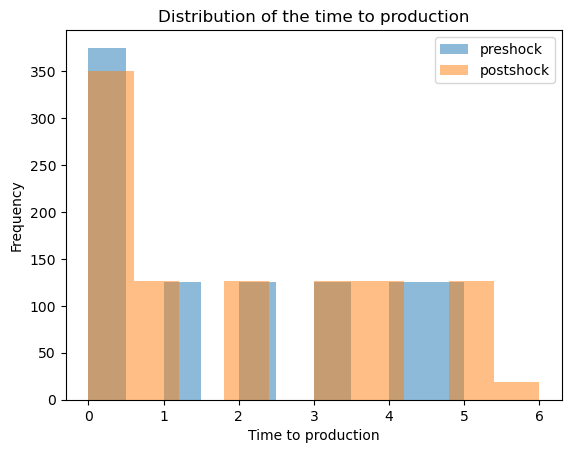

In [34]:
plt.hist(tau1, alpha=0.5)
plt.hist(tau2, alpha=0.5)
plt.title('Distribution of the time to production')
plt.xlabel('Time to production')
plt.ylabel('Frequency')
plt.legend(['preshock', 'postshock'])

plt.show()

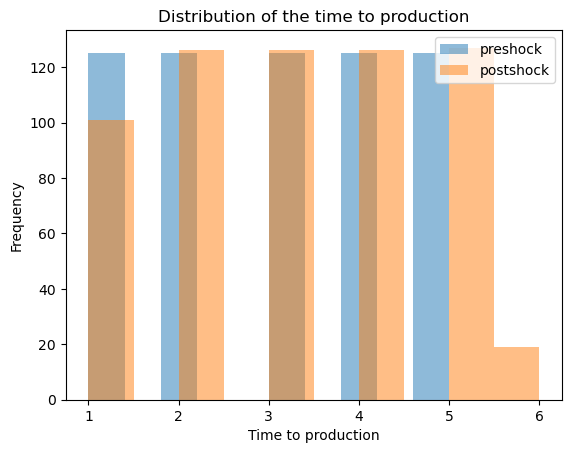

In [37]:
plt.hist(tau1[tau1 !=0], alpha=0.5)
plt.hist(tau2[tau1 !=0], alpha=0.5)
plt.title('Distribution of the time to production')
plt.xlabel('Time to production')
plt.ylabel('Frequency')
plt.legend(['preshock', 'postshock'])

In [36]:
P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma))
P = np.zeros((int(np.max(tau2))+2, 1))
P[0,0] = P0 
P[-1,0] = P0
for j in range(0, int(np.max(tau2))): 
    tau1_temp = tau1[tau1 != j]
    tau2_temp = tau2[tau2 == j]
    N_temp1 = N[tau1 != j]
    N_temp2 = N1[tau2 == j]
    N_temp = np.concatenate([N_temp1, N_temp2])
    tau_temp = np.concatenate([tau1_temp, tau2_temp])
    tprod_temp = beta**tau_temp * (tau_temp + N_temp)
    P[j+1,0] = (np.sum(1/(tprod_temp)**(1-sigma)))**(1/(1-sigma))